In [1]:
import pandas

In [2]:
import pandas as pd

In [3]:
pd?

# Introducing Pandas Objects

In [4]:
import numpy as np
import pandas as pd

## The Pandas Series Object

### Series as generalized Numpy array

In [5]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data 
#Series used for manipulating the pattern of data that are kept in an array.

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [6]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [7]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
data[1]

0.5

In [9]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [10]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [11]:
data['b']

0.5

In [12]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [13]:
data[5]

0.5

### Series as specialized dictionary

In [14]:
population_dict = {'California': 3833521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California     3833521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [15]:
population['California':'Illinois']

California     3833521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

### Constructing Series objects

In [16]:
pd.Series([2, 4, 6]) # Index defaults to an integer sequence

0    2
1    4
2    6
dtype: int64

In [17]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [18]:
pd.Series({2: 'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [19]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

# The Pandas DataFrame Object

### DataFrame as a generalized Numpy array

In [20]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
            'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [21]:
states = pd.DataFrame({'population': population,
                      'area': area})
states

population    area
California     3833521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995

In [22]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [23]:
states.columns

Index(['population', 'area'], dtype='object')

### DataFram as specialized dictionary

In [24]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [25]:
states['population']

California     3833521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

### Constructing DataFrame objects

### From a single Series object

In [26]:
pd.DataFrame(population, columns=['population'])

population
California     3833521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135

In [27]:
pd.DataFrame(population, columns=['area'])

area
California   3833521
Texas       26448193
New York    19651127
Florida     19552860
Illinois    12882135

### From a list of dicts

In [28]:
data = [{'a': i, 'b': 2 * i}
    for i in range(3)]
pd.DataFrame(data)

a  b
0  0  0
1  1  2
2  2  4

### From a list of dicts

In [29]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

a  b    c
0  1.0  2  NaN
1  NaN  3  4.0

### From a dictionary of Series objects

In [30]:
pd.DataFrame({'population': population, 'area': area})

population    area
California     3833521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995

### From a two-dimensional NumPy array

In [31]:
pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'], index=['a', 'b', 'c'])

foo       bar
a  0.038113  0.270014
b  0.659488  0.082447
c  0.314470  0.862361

### From a Numpy structured array

In [32]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [33]:
pd.DataFrame(A)

A    B
0  0  0.0
1  0  0.0
2  0  0.0

## The Pandas Index Object

In [34]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as immutable array

In [35]:
ind[1]

3

In [36]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [37]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [41]:
ind[1] = 0

TypeError: Index does not support mutable operations

### Index as ordered set

In [42]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [43]:
indA & indB # Intersection

Int64Index([3, 5, 7], dtype='int64')

In [44]:
indA | indB # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [45]:
indA ^ indB # symmetric difference Universe - (A & B)

Int64Index([1, 2, 9, 11], dtype='int64')

# Data Indexing and Selection

## Data Selection in Series

### Series as dictionary

In [46]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [47]:
data['b']

0.5

In [48]:
'a' in data

True

In [49]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [50]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [51]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

### Series as one-dimensional array

In [52]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [53]:
# slicing by implicit index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [54]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [55]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

### Indexers: loc, iloc, and ix

In [56]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [57]:
# explict index when indexing
data[1]

'a'

In [58]:
# implict index when slicing
data[1:3]

3    b
5    c
dtype: object

In [59]:
data.loc[1]

'a'

In [60]:
data.loc[1:3] # loc allows indexing and slicing that always references the explicit index

1    a
3    b
dtype: object

In [61]:
data.loc[1:5]

1    a
3    b
5    c
dtype: object

In [62]:
data.iloc[1]
'b'

'b'

In [63]:
data.iloc[1:3]

3    b
5    c
dtype: object

In [64]:
data.iloc[:3]

1    a
3    b
5    c
dtype: object

In [65]:
data.iloc[0] # iloc allows indexing and slicing that always references the implicit Python-style index

'a'

## Data Selection in DataFrame

### DataFrame as a dictionary

In [66]:
import pandas as pd
area = pd.Series({'California': 423967, 'Texas': 695662,
                'New York': 141297, 'Florida': 170312,
                'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                'New York': 19651127, 'Florida': 19552860,
                'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'population':pop})
data

area  population
California  423967    38332521
Texas       695662    26448193
New York    141297    19651127
Florida     170312    19552860
Illinois    149995    12882135

In [67]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [68]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [69]:
data.population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [70]:
data.area is data['area']

True

In [71]:
# data.pop is data['pop']

In [72]:
data['density'] = data['population'] / data['area']
data

area  population     density
California  423967    38332521   90.413926
Texas       695662    26448193   38.018740
New York    141297    19651127  139.076746
Florida     170312    19552860  114.806121
Illinois    149995    12882135   85.883763

### DataFrame as two-dimensional array

In [73]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [74]:
data.T # Transpose matrix

California         Texas      New York       Florida  \
area        4.239670e+05  6.956620e+05  1.412970e+05  1.703120e+05   
population  3.833252e+07  2.644819e+07  1.965113e+07  1.955286e+07   
density     9.041393e+01  3.801874e+01  1.390767e+02  1.148061e+02   

                Illinois  
area        1.499950e+05  
population  1.288214e+07  
density     8.588376e+01

In [75]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [76]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [77]:
data.iloc[:3, :2]

area  population
California  423967    38332521
Texas       695662    26448193
New York    141297    19651127

In [78]:
data.loc[:'Illinois', :'population']

area  population
California  423967    38332521
Texas       695662    26448193
New York    141297    19651127
Florida     170312    19552860
Illinois    149995    12882135

In [79]:
data.ix[:3, :'population']

/home/thanadon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


area  population
California  423967    38332521
Texas       695662    26448193
New York    141297    19651127

In [80]:
data.loc[data.density > 100, ['population', 'density']]

population     density
New York    19651127  139.076746
Florida     19552860  114.806121

In [81]:
data.iloc[0, 2] = 90
data

area  population     density
California  423967    38332521   90.000000
Texas       695662    26448193   38.018740
New York    141297    19651127  139.076746
Florida     170312    19552860  114.806121
Illinois    149995    12882135   85.883763

### Additional indexing conventions

In [82]:
data['Florida':'Illinois']

area  population     density
Florida   170312    19552860  114.806121
Illinois  149995    12882135   85.883763

In [83]:
data[1:3]

area  population     density
Texas     695662    26448193   38.018740
New York  141297    19651127  139.076746

In [84]:
data[data.density > 100]

area  population     density
New York  141297    19651127  139.076746
Florida   170312    19552860  114.806121

# Operating on Data in Pandas

## Ufuncs: Index Preservation

In [85]:
import pandas as pd
import numpy as np

In [86]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [87]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                 columns=['A','B','C','D'])
df

A  B  C  D
0  6  9  2  6
1  7  4  3  7
2  7  2  5  4

In [88]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [89]:
np.sin(df * np.pi / 4)

A             B         C             D
0 -1.000000  7.071068e-01  1.000000 -1.000000e+00
1 -0.707107  1.224647e-16  0.707107 -7.071068e-01
2 -0.707107  1.000000e+00 -0.707107  1.224647e-16

## UFuncs: Index Alignment

### Index alignment in Series

In [90]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                       'New York': 19651127}, name='population')

In [91]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [92]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [93]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [94]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Index alignment in DataFrame

In [95]:
A = pd.DataFrame(rng.randint(0, 20, (2,2)), columns=list('AB'))
A

A   B
0  1  11
1  5   1

In [96]:
B = pd.DataFrame(rng.randint(0, 10, (3,3)), columns=list('BAC'))
B

B  A  C
0  4  0  9
1  5  8  0
2  9  2  6

In [97]:
A + B

A     B   C
0   1.0  15.0 NaN
1  13.0   6.0 NaN
2   NaN   NaN NaN

In [98]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

A     B     C
0   1.0  15.0  13.5
1  13.0   6.0   4.5
2   6.5  13.5  10.5

## Ufunc: Operations Between DataFrame and Series

In [99]:
A = rng.randint(10, size=(3,4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [100]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [101]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

Q  R  S  T
0  0  0  0  0
1 -1 -2  2  4
2  3 -7  1  4

In [102]:
print(df)
print(df.iloc[0]) # row at 0

   Q  R  S  T
0  3  8  2  4
1  2  6  4  8
2  6  1  3  8
Q    3
R    8
S    2
T    4
Name: 0, dtype: int64


In [103]:
df.subtract(df['R'], axis=0)

Q  R  S  T
0 -5  0 -6 -4
1 -4  0 -2  2
2  5  0  2  7

In [104]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int64

In [105]:
df - halfrow

Q   R    S   T
0  0.0 NaN  0.0 NaN
1 -1.0 NaN  2.0 NaN
2  3.0 NaN  1.0 NaN

# Handling Mission Data

## Trade-Offs in Mission Data Conventions

In [106]:
# Masking approach -> the mask might be an entirely seperate Boolean array
# Sentinel approach -> data-specific convention (-9999, NaN)
# Non of these approach -> use of a seperate mask array requires allocation of an additional Boolean array

## Missing Data in Pandas

In [107]:
# Numpy does have support for masked arrays 
#that have a seperate Boolean mask array attached for marking data
# Pandas chose to use sentinels for missing data, and use two alread-existing Python null values:
# the special floting-point NaN value, and the Python None object

### None: Pythonic missing data

In [108]:
import numpy as np
import pandas as pd

In [109]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [110]:
for dtype in ['object', 'int']:
    print("dtype = ", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype =  object
48.8 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype =  int
1.47 ms ± 51.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



In [111]:
#vals1.sum() Error

### NaN: Missing numerical data

In [112]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [113]:
1 + np.nan

nan

In [114]:
0 * np.nan

nan

In [115]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [116]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2) # Sum all values

(8.0, 1.0, 4.0)

In [117]:
vals2

array([ 1., nan,  3.,  4.])

### NaN and None in Pandas

In [118]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [119]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [120]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

## Operating on Null Values

### Detecting null values

In [121]:
data = pd.Series([1, np.nan, 'hello', None])

In [122]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [123]:
data[data.notnull()]

0        1
2    hello
dtype: object

### Dropping null values

In [124]:
data.dropna() # Removes NA values

0        1
2    hello
dtype: object

In [125]:
df = pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])
df

0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6

In [126]:
df.dropna(axis='columns') 
# Dropping all columns that contains a null value

2
0  2
1  5
2  6

In [127]:
df[3] = np.nan # Add all NaN values into a column
df

0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN

In [128]:
df.dropna(axis='columns', how='all') 
# Only drop a row or column that are all null values

0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6

In [129]:
df.dropna(axis='rows', thresh=3) 
# thresh is a minimum number of non-null values for the rows/column to be kept

0    1  2   3
1  2.0  3.0  5 NaN

### Filling null values

In [130]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [131]:
data.fillna(0) 
# Fill NA entries with a single value such as zero

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [132]:
# forward-fill
data.fillna(method='ffill')
# Specify a forward-fill to propagate the previous value forward

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [133]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [134]:
df

0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN

In [135]:
df.fillna(method='ffill', axis=1)
# Forward-fill along with horizontal axis

0    1    2    3
0  1.0  1.0  2.0  2.0
1  2.0  3.0  5.0  5.0
2  NaN  4.0  6.0  6.0

# Hierarchical Indexing

In [136]:
import pandas as pd
import numpy as np

## A Multiply Indexed Series

### The bad way

In [137]:
index = [('California', 2000), ('California', 2010), 
         ('New York',2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations= [33871648, 37253956,
              18976457, 19378102,
              20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [138]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [139]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

### The bettter way: Pandas MultiIndex

In [140]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [141]:
pop = pop.reindex(index) 
# Reindex our series with this MultiIndex
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [142]:
pop[:, 2010]
# Output only countries that have 2010

California    37253956
New York      19378102
Texas         25145561
dtype: int64

### MultiIndex as extra dimension

In [143]:
pop_df = pop.unstack()
# Convert a multiply indexed series into a indexed DataFrame
pop_df

2000      2010
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561

In [144]:
pop_df.stack() 
# Convert a indexed DataFrame into a multiply index series

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [145]:
pop_df = pd.DataFrame({'total': pop, 'under18': [9267089, 9284094,
                                                4687374, 4318033,
                                                5906301, 6879014]})
pop_df
# Using MultiIndex to add another column to the DatFrame

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [146]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

2000      2010
California  0.273594  0.249211
New York    0.247010  0.222831
Texas       0.283251  0.273568

## Methods of MultiIndex Creation

In [147]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.949753  0.161490
  2  0.524222  0.291630
b 1  0.637539  0.742296
  2  0.514217  0.580618

In [148]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
New York    2000    18976457
            2010    19378102
dtype: int64

### Explicit MultiIndex constructors

In [149]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [150]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])
# Construct multiIndex and add labels

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [151]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])
# Construct multiIndex and add labels 
# but it is using one product instead of repeating 

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [152]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              labels=[[0, 0, 1, 1], [0, 1, 0 ,1]])
# Construct MultiIndex directly

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

### MultiIndex level names

In [153]:
pop.index.names = ['state', 'year']
pop
# Setting the names attribute of the index after the fact

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### MultiIndex for columns

In [154]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6) , 1)
data[:, :: 2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      30.0  36.4  45.0  35.3  25.0  39.2
     2      15.0  37.0  42.0  37.7  45.0  38.3
2014 1      34.0  39.0  36.0  36.8  38.0  36.2
     2      41.0  37.8  36.0  39.1  45.0  39.3

In [155]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      45.0  35.3
     2      42.0  37.7
2014 1      36.0  36.8
     2      36.0  39.1

## Indexing and Slicing a MultiIndex

### Multiply indexed Series

In [156]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [157]:
pop['California', 2000]
# indexing with multiple terms

33871648

In [158]:
pop['California']
# Partial indexing (one of the levels in the index)

year
2000    33871648
2010    37253956
dtype: int64

In [159]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [160]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [161]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [162]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

### Multiply indexed DataFrames

In [163]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      30.0  36.4  45.0  35.3  25.0  39.2
     2      15.0  37.0  42.0  37.7  45.0  38.3
2014 1      34.0  39.0  36.0  36.8  38.0  36.2
     2      41.0  37.8  36.0  39.1  45.0  39.3

In [164]:
health_data['Guido', 'HR']

year  visit
2013  1        45.0
      2        42.0
2014  1        36.0
      2        36.0
Name: (Guido, HR), dtype: float64

In [165]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      30.0  36.4
     2      15.0  37.0

In [166]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        30.0
      2        15.0
2014  1        34.0
      2        41.0
Name: (Bob, HR), dtype: float64

In [172]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

subject      Bob Guido   Sue
type          HR    HR    HR
year visit                  
2013 1      30.0  45.0  25.0
2014 1      34.0  36.0  38.0

## Rearranging Multi-Indices

### Sorted and unsorted indices

In [173]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
# Cartesian
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
# Setting index names
data

char  int
a     1      0.471484
      2      0.648679
c     1      0.784761
      2      0.229698
b     1      0.271579
      2      0.451381
dtype: float64

In [175]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [176]:
data = data.sort_index()
data

char  int
a     1      0.471484
      2      0.648679
b     1      0.271579
      2      0.451381
c     1      0.784761
      2      0.229698
dtype: float64

In [177]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

In [178]:
data['a':'b']

char  int
a     1      0.471484
      2      0.648679
b     1      0.271579
      2      0.451381
dtype: float64

### Stacking and unstacking indices

In [179]:
pop.unstack(level=0)

state  California  New York     Texas
year                                 
2000     33871648  18976457  20851820
2010     37253956  19378102  25145561

In [180]:
pop.unstack(level=1)

year            2000      2010
state                         
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561

In [181]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Index setting and resetting

In [182]:
pop_flat = pop.reset_index(name='population')
# setting index of population colunm
pop_flat

state  year  population
0  California  2000    33871648
1  California  2010    37253956
2    New York  2000    18976457
3    New York  2010    19378102
4       Texas  2000    20851820
5       Texas  2010    25145561

In [183]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

## Data Aggregations on Multi-Indices

In [184]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      30.0  36.4  45.0  35.3  25.0  39.2
     2      15.0  37.0  42.0  37.7  45.0  38.3
2014 1      34.0  39.0  36.0  36.8  38.0  36.2
     2      41.0  37.8  36.0  39.1  45.0  39.3

In [185]:
data_mean = health_data.mean(level='year')
# Average between visit 1 and 2 in each year and merge to one row
data_mean

subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     22.5  36.7  43.5  36.50  35.0  38.75
2014     37.5  38.4  36.0  37.95  41.5  37.75

In [186]:
data_mean.mean(axis=1, level='type')

type         HR       Temp
year                      
2013  33.666667  37.316667
2014  38.333333  38.033333

## Combining Datasets: Concat and Append

In [187]:
import pandas as pd
import numpy as np

In [188]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
           for c in cols}
    return pd.DataFrame(data, ind)

# Example DataFrame
make_df('ABC', range(3))
    

A   B   C
0  A0  B0  C0
1  A1  B1  C1
2  A2  B2  C2

### Recall: Concatenation of NumPy Arrays

In [189]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [190]:
x = [[1, 2], [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [191]:
np.concatenate([x, x], axis=0)

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

### Simple Concetenation with pd.concat

In [192]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [193]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1);
print(df2);
print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [194]:
df3 = make_df('CD', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3);
print(df4);
print(pd.concat([df3, df4], axis=1))

    C   D
0  C0  D0
1  C1  D1
    C   D
0  C0  D0
1  C1  D1
    C   D   C   D
0  C0  D0  C0  D0
1  C1  D1  C1  D1


### Duplicate indices

In [195]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # make duplicate indices!
print(x)
print(y)
print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


### catching the repeats as an error

In [196]:
try:
    pd.concat([x, y], verify_integrity=True)
    # Index from both DataFrames are overlapped
except ValueError as e:
        print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


### Ignoring the index

In [197]:
print(x)
print(y)
print(pd.concat([x, y], ignore_index=True))
# The concatenation will create a new integer index for the resulting Series

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


### Adding MultiIndex keys

In [198]:
print(x)
print(y)
print(pd.concat([x, y], keys=['x', 'y']))
# x index for DataFrame named x
# y index for DataFrame named y

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


### Concatenation with joins

In [199]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5)
print(df6)
print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


/home/thanadon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """


In [200]:
print(df5)
print(df6)
print(pd.concat([df5, df6], join='inner'))
# inner for intersection
# outer for union

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [201]:
print(df5)
print(df6)
print(pd.concat([df5, df6], join_axes=[df5.columns]))
# Specifying the index of the remaining colunms
# let the column contains NaN

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


### The append() method

In [202]:
print(df1)
print(df2)
print(df1.append(df2))
# like df1.concat([df1, df2]) but df1.concat() is better
# because df1.append() creates a new object with the combined data.
# And involves creation of a new index and data buffer.

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [203]:
print(df5)
print(df6)
print(df5.append(df6))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


/home/thanadon/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


## Combining Datasets: Merge and Join

### Relational Algebra

In [204]:
# pd.merge()?
# join()

## Categories of Joins

### One-to-one joins

In [214]:
df3 = pd.merge(df1, df2)
df3
# To combine this information into a single DataFrame, we can use the pd.merge() function

employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

### Many-to-one joins

### Many-to-many joins

In [215]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                              'skills': ['math', 'spreadsheets', 'coding', 'linux',
                                         'spreadsheets', 'organization']})
print(df1)
print(df5)
print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


## Specification of the Merge Key

### The on keyword

In [216]:
print(df1)
print(df2)
print(pd.merge(df1, df2, on='employee'))
# Explicitly specify the name of the key column using the on keyword

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


### The left_on and right_on keywords

In [217]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})

In [223]:
print(df1)
print(df3)
print(pd.merge(df1, df3, left_on="employee", right_on="name"))
# The keyword "name" used to merge DataFrame(df3) at the right handside

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


### The left_index and right_index keywords

In [225]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)
# set the index of both DataFrames to be the same

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [231]:
print(df1a); print(df2a);
print(pd.merge(df1a, df2a, left_index=True, right_index=True))
# Composite function by using the employee keyword

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [232]:
print(df1a); print(df2a); print(df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


## Specifying Set Arithmetric for Joins

In [244]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                    columns=['name', 'drink'])
print(df6); print(df7); print(pd.merge(df6, df7))
# Peter is not be in df7 and Joseph is not be in df6
# Therefore, when both DataFrames are merged, it shows only Mary

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [246]:
pd.merge(df6, df7, how='inner')
# Inner join

name   food drink
0  Mary  bread  wine

In [248]:
print(df6); print(df7); print(pd.merge(df6, df7, how='outer'))
# Peter is only in df6 and Paul is only in df7
# Therefore, Pandas adds NaN ( A special floating number) instead a null value

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [251]:
print(df6); print(df7); print(pd.merge(df6, df7, how='left'))
# Set the names from df6 is the main row used to merge both DataFrames

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


## Overlapping Column Names: The suffixes Keyword

In [256]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                     'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on='name'))
# Data from both DataFrames are not compatible
# Therefore, Pandas creates seperated columns from df8 and df9

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [259]:
print(df8); print(df9);
print(pd.merge(df8, df9, on='name', suffixes=["_L", "_R"]))
# Name the new seperated columns to be _L and _R

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


## Example: US States Data

In [262]:
pop = pd.read_csv('data-USstates/state-population.csv')
areas = pd.read_csv('data-USstates/state-areas.csv')
abbrevs = pd.read_csv('data-USstates/state-abbrevs.csv')
# Read files naemd .csv
print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [275]:
merged = pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop dulicate info
print(merged)
merged.head()
# merged.head(n) - Return the first n rows
# By default, n = 5

     state/region     ages  year   population    state
0              AL  under18  2012    1117489.0  Alabama
1              AL    total  2012    4817528.0  Alabama
2              AL  under18  2010    1130966.0  Alabama
3              AL    total  2010    4785570.0  Alabama
4              AL  under18  2011    1125763.0  Alabama
5              AL    total  2011    4801627.0  Alabama
6              AL    total  2009    4757938.0  Alabama
7              AL  under18  2009    1134192.0  Alabama
8              AL  under18  2013    1111481.0  Alabama
9              AL    total  2013    4833722.0  Alabama
10             AL    total  2007    4672840.0  Alabama
11             AL  under18  2007    1132296.0  Alabama
12             AL    total  2008    4718206.0  Alabama
13             AL  under18  2008    1134927.0  Alabama
14             AL    total  2005    4569805.0  Alabama
15             AL  under18  2005    1117229.0  Alabama
16             AL    total  2006    4628981.0  Alabama
17        

state/region     ages  year  population    state
0           AL  under18  2012   1117489.0  Alabama
1           AL    total  2012   4817528.0  Alabama
2           AL  under18  2010   1130966.0  Alabama
3           AL    total  2010   4785570.0  Alabama
4           AL  under18  2011   1125763.0  Alabama

In [277]:
merged.isnull().any
# Double-check whether there were any mismatches here

<bound method DataFrame.any of       state/region   ages   year  population  state
0            False  False  False       False  False
1            False  False  False       False  False
2            False  False  False       False  False
3            False  False  False       False  False
4            False  False  False       False  False
5            False  False  False       False  False
6            False  False  False       False  False
7            False  False  False       False  False
8            False  False  False       False  False
9            False  False  False       False  False
10           False  False  False       False  False
11           False  False  False       False  False
12           False  False  False       False  False
13           False  False  False       False  False
14           False  False  False       False  False
15           False  False  False       False  False
16           False  False  False       False  False
17           False  False  False 

In [281]:
merged[merged['population'].isnull()].head()
# head() used for showing only the first five rows

state/region     ages  year  population state
2448           PR  under18  1990         NaN   NaN
2449           PR    total  1990         NaN   NaN
2450           PR    total  1991         NaN   NaN
2451           PR  under18  1991         NaN   NaN
2452           PR    total  1993         NaN   NaN

In [282]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [284]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any
# No more nulls in the state column

<bound method DataFrame.any of       state/region   ages   year  population  state
0            False  False  False       False  False
1            False  False  False       False  False
2            False  False  False       False  False
3            False  False  False       False  False
4            False  False  False       False  False
5            False  False  False       False  False
6            False  False  False       False  False
7            False  False  False       False  False
8            False  False  False       False  False
9            False  False  False       False  False
10           False  False  False       False  False
11           False  False  False       False  False
12           False  False  False       False  False
13           False  False  False       False  False
14           False  False  False       False  False
15           False  False  False       False  False
16           False  False  False       False  False
17           False  False  False 

In [289]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()
# join on the state column in both

state/region     ages  year  population    state  area (sq. mi)
0           AL  under18  2012   1117489.0  Alabama        52423.0
1           AL    total  2012   4817528.0  Alabama        52423.0
2           AL  under18  2010   1130966.0  Alabama        52423.0
3           AL    total  2010   4785570.0  Alabama        52423.0
4           AL  under18  2011   1125763.0  Alabama        52423.0

In [290]:
final.isnull().any()
# There are nulls in the area column

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [296]:
final['state'][final['area (sq. mi)'].isnull()].unique()
# unique() used for Hash table-based unique. 
# Uniques are returned in order of appearance. This does NOT sort.
# DataFrame does not contain the area of the United States as a whole.

array(['United States'], dtype=object)

In [300]:
final.dropna(inplace=True)
# Drop NA values = Remove missing values
final.head()

state/region     ages  year  population    state  area (sq. mi)
0           AL  under18  2012   1117489.0  Alabama        52423.0
1           AL    total  2012   4817528.0  Alabama        52423.0
2           AL  under18  2010   1130966.0  Alabama        52423.0
3           AL    total  2010   4785570.0  Alabama        52423.0
4           AL  under18  2011   1125763.0  Alabama        52423.0

In [314]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010

state/region   ages  year  population                 state  \
3              AL  total  2010   4785570.0               Alabama   
91             AK  total  2010    713868.0                Alaska   
101            AZ  total  2010   6408790.0               Arizona   
189            AR  total  2010   2922280.0              Arkansas   
197            CA  total  2010  37333601.0            California   
283            CO  total  2010   5048196.0              Colorado   
293            CT  total  2010   3579210.0           Connecticut   
379            DE  total  2010    899711.0              Delaware   
389            DC  total  2010    605125.0  District of Columbia   
475            FL  total  2010  18846054.0               Florida   
485            GA  total  2010   9713248.0               Georgia   
570            HI  total  2010   1363731.0                Hawaii   
581            ID  total  2010   1570718.0                 Idaho   
666            IL  total  2010  12839695.0              Illinois   
677            IN  total  2010   6489965.0               Indiana   
762            IA  total  2010   3050314.0                  Iowa   
773            KS  total  2010   2858910.0                Kansas   
858            KY  total  2010   4347698.0              Kentucky   
869            LA  total  2010   4545392.0             Louisiana   
954            ME  total  2010   1327366.0                 Maine   
965            MD  total  2010   5787193.0              Maryland   
1050           MA  total  2010   6563263.0         Massachusetts   
1061           MI  total  2010   9876149.0              Michigan   
1146           MN  total  2010   5310337.0             Minnesota   
1157           MS  total  2010   2970047.0           Mississippi   
1242           MO  total  2010   5996063.0              Missouri   
1253           MT  total  2010    990527.0               Montana   
1338           NE  total  2010   1829838.0              Nebraska   
1349           NV  total  2010   2703230.0                Nevada   
1434           NH  total  2010   1316614.0         New Hampshire   
1445           NJ  total  2010   8802707.0            New Jersey   
1530           NM  total  2010   2064982.0            New Mexico   
1541           NY  total  2010  19398228.0              New York   
1626           NC  total  2010   9559533.0        North Carolina   
1637           ND  total  2010    674344.0          North Dakota   
1722           OH  total  2010  11545435.0                  Ohio   
1733           OK  total  2010   3759263.0              Oklahoma   
1818           OR  total  2010   3837208.0                Oregon   
1829           PA  total  2010  12710472.0          Pennsylvania   
1914           RI  total  2010   1052669.0          Rhode Island   
1925           SC  total  2010   4636361.0        South Carolina   
2010           SD  total  2010    816211.0          South Dakota   
2021           TN  total  2010   6356683.0             Tennessee   
2106           TX  total  2010  25245178.0                 Texas   
2117           UT  total  2010   2774424.0                  Utah   
2202           VT  total  2010    625793.0               Vermont   
2213           VA  total  2010   8024417.0              Virginia   
2298           WA  total  2010   6742256.0            Washington   
2309           WV  total  2010   1854146.0         West Virginia   
2394           WI  total  2010   5689060.0             Wisconsin   
2405           WY  total  2010    564222.0               Wyoming   
2490           PR  total  2010   3721208.0           Puerto Rico   

      area (sq. mi)  
3           52423.0  
91         656425.0  
101        114006.0  
189         53182.0  
197        163707.0  
283        104100.0  
293          5544.0  
379          1954.0  
389            68.0  
475         65758.0  
485         59441.0  
570         10932.0  
581         83574.0  
666         57918.0  
677         36420.0  
762         56276.0  
773         82282.0  
858 

In [315]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']
# Compute the population density and display it

In [321]:
density.sort_values(ascending=False, inplace=True)
density.head()
# The result is a ranking of US states plus Washington, DC,
# and Puerto Rico in order of their 2010 population density per square mile.

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [325]:
density.tail()
# density.tail() returns the last n rows

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

# Aggregation and Grouping

## Planets Data

In [328]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [329]:
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

## Simple Aggregation in Pandas

In [334]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser
# Use aggregations in NumPy

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [335]:
ser.sum()

2.811925491708157

In [337]:
ser.mean()

0.5623850983416314

In [339]:
df = pd.DataFrame({'A': rng.rand(5), 'B': rng.rand(5)})
df

A         B
0  0.183405  0.611853
1  0.304242  0.139494
2  0.524756  0.292145
3  0.431945  0.366362
4  0.291229  0.456070

In [341]:
df.mean()
# Find mean from both A and B columns

A    0.347115
B    0.373185
dtype: float64

In [343]:
df.mean(axis='columns')
# Specifying the axis argument (colmun) to get mean

0    0.397629
1    0.221868
2    0.408451
3    0.399153
4    0.373650
dtype: float64

In [347]:
planets.dropna().describe()
# describe() computes several common aggregates
# for each column and returns the result
# Remove missing data and computes common aggregates 
# for each column and returns the result

number  orbital_period        mass    distance         year
count  498.00000      498.000000  498.000000  498.000000   498.000000
mean     1.73494      835.778671    2.509320   52.068213  2007.377510
std      1.17572     1469.128259    3.636274   46.596041     4.167284
min      1.00000        1.328300    0.003600    1.350000  1989.000000
25%      1.00000       38.272250    0.212500   24.497500  2005.000000
50%      1.00000      357.000000    1.245000   39.940000  2009.000000
75%      2.00000      999.600000    2.867500   59.332500  2011.000000
max      6.00000    17337.500000   25.000000  354.000000  2014.000000

## GroupBy: Split, Apply, Combine

### Split, apply, combine

In [348]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

key  data
0   A     0
1   B     1
2   C     2
3   A     3
4   B     4
5   C     5

In [352]:
df.groupby('key')
# Split - [ [A, 0], [A, 3]], [[B, 1], [B, 4], [[C, 2],[C, 5]] ]
# Apply (sum) - [A, 3], [B, 5], [C, 7]
# Combine - [ [A,3], [B, 5], [C, 7]]
df

key  data
0   A     0
1   B     1
2   C     2
3   A     3
4   B     4
5   C     5

In [353]:
df.groupby('key').sum()

data
key      
A       3
B       5
C       7

### The GroupBy object

In [354]:
# The GroupBy obect is very flexible abstaction.
# GroupBy are aggregate, filter, transform, apply

### Column indexing

In [355]:
planets.groupby('method')

In [357]:
planets.groupby('method')['orbital_period']

In [359]:
planets.groupby('method')['orbital_period'].median()
# The general scale of orbital periods (in days) that each method is sensitive to.

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

### Iteration over groups

In [372]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))
    # print 0-30 characters and shape = shape of group
# The Groupby object supports direct iteration over the groups
# Returning each group as a Series or DataFrame

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


### Dispatch methods

In [401]:
planets.groupby('method')['year'].describe().unstack()
# planets.unstack() used to rotate inner level

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

### Aggregate, filter, transform, apply

In [402]:
rng = np.random.RandomState(0)

In [411]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df
# Group by objects

key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

### Aggregation

In [414]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [413]:
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

data1  data2
key              
A        0      5
B        1      7
C        2      9

### Filtering

In [420]:
def filter_func(x):
    return x['data2'].std() > 4
print(df)
print(df.groupby('key').std())
print(df.groupby('key').filter(filter_func))
# Keep all groups in which the standard deviation is larger than some critical value

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


### Transformation

In [423]:
df.groupby('key').transform(lambda x: x - x.mean())
# To center the data by subtracking the group-wise mean

data1  data2
0   -1.5    1.0
1   -1.5   -3.5
2   -1.5   -3.0
3    1.5   -1.0
4    1.5    3.5
5    1.5    3.0

### The apply() method

In [426]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x
print(df); print(df.groupby('key').apply(norm_by_data2))
# apply() within a GroupBy is flexible
# Because you can create the function takes a DataFrame and returns Pandas object or scalar

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


### Specifying the split key

### A list, array, series,  or index providing the grouping keys

In [434]:
L = [0, 1, 0, 1, 2, 0]
print(df); print(df.groupby(L).sum())
# Group 0 -> [A, 0, 5], [C, 2, 3], [C, 5, 9] > sum()
# Group 1 -> [B, 1, 0], [A, 3, 3] > sum()
# Group 2 -> [B, 4, 7] > sum()

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


In [436]:
print(df); print(df.groupby(df['key']).sum())
# Key A -> [0, 2], [3, 3] > sum()
# Key B -> [1, 0], [4, 7] > sum()
# key C -> [2, 3], [5, 9] > sum()

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
     data1  data2
key              
A        3      8
B        5      7
C        7     12


### A dictionary or series mapping index to group

In [437]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2);
print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
consonant     12     19
vowel          3      8


### Any Python function.

In [440]:
print(df2);
print(df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


### A list of valid keys.

In [444]:
df2.groupby([str.lower, mapping]).mean()

data1  data2
a vowel        1.5    4.0
b consonant    2.5    3.5
c consonant    3.5    6.0

### Grouping example

In [451]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)
# group by 1980s, 1990s, 2000s, 2010s
# sum() - sum all methods for each year
# unstack() - rotate inner level
# fillna(0) - replace a NA value with 0

decade                         1980s  1990s  2000s  2010s
method                                                   
Astrometry                       0.0    0.0    0.0    2.0
Eclipse Timing Variations        0.0    0.0    5.0   10.0
Imaging                          0.0    0.0   29.0   21.0
Microlensing                     0.0    0.0   12.0   15.0
Orbital Brightness Modulation    0.0    0.0    0.0    5.0
Pulsar Timing                    0.0    9.0    1.0    1.0
Pulsation Timing Variations      0.0    0.0    1.0    0.0
Radial Velocity                  1.0   52.0  475.0  424.0
Transit                          0.0    0.0   64.0  712.0
Transit Timing Variations        0.0    0.0    0.0    9.0

# Pivot Tables

## Motivating Pivot Tables

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

## Pivot Tables by Hand

In [4]:
titanic.groupby('sex')[['survived']].mean()

survived
sex             
female  0.742038
male    0.188908

In [5]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()
# Level 0 Class -> First Second Third
# Level 1 Sex
# Level 2 Row 0 -> Female, Row 1 -> Male

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

## Pivot Table Syntax

In [6]:
titanic.pivot_table('survived', index='sex', columns='class')

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

### Multilevel pivot tables

In [7]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')
# Level 0: class
# Level 1: 1.1 sex, 1.2 age
# Level 2: survived

class               First    Second     Third
sex    age                                   
female (18, 80]  0.909091  1.000000  0.511628
       NaN       0.972973  0.900000  0.423729
male   (18, 80]  0.800000  0.600000  0.215686
       NaN       0.375000  0.071429  0.133663

In [8]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (18, 80]              NaN  1.000000  0.714286          0.909091   
       NaN                   NaN  0.880000  0.444444          0.972973   
male   (18, 80]              NaN  0.000000  0.260870          0.800000   
       NaN                   0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (18, 80]  1.000000  0.318182  
       NaN       0.914286  0.391304  
male   (18, 80]  0.818182  0.178571  
       NaN       0.030303  0.192308

### Additional pivot table options

In [9]:
# call signature as of Pandas 0.18
titanic.pivot_table(index='sex', columns='class',
                      aggfunc={'survived':'sum', 'fare':'mean'})
# index -> sex (female, male) [Level 2]
# columns -> class (First, Second, Third) [Level 1]
# aggfunc -> sum in survived and mean in fare [Level 0]

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [10]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class      First    Second     Third       All
sex                                           
female  0.968085  0.921053  0.500000  0.742038
male    0.368852  0.157407  0.135447  0.188908
All     0.629630  0.472826  0.242363  0.383838

## Example: Birthrate Data

In [11]:
births = pd.read_csv('births.csv')

In [12]:
births.head()

year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

In [13]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
# Data -> births
# index -> decade
# colums -> gender
# aggfunc -> sum()

gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

Text(0,0.5,'total births per year')

### Further data exploration

In [16]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [22]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births.head()

year  month  day gender  births  decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960

In [24]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [25]:
# create a datatime index from the year, months, day
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                  columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [28]:
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [29]:
births_by_date.index = [pd.datetime(2012, month, day)
                       for (month, day) in births_by_date.index]
births_by_date.head()

births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625

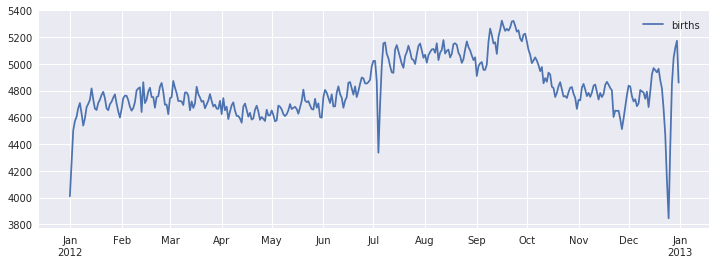

In [33]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);
# A timer series reflecting the average number of births by date of the year.

# Vectorized String Operations

## Introducing Pandas String Operations

In [34]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [35]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [38]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [39]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [42]:
names.str.capitalize()
# capitalize all the entries, while skipping over any missing values

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

## Tables of Pandas String Methods

In [43]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

### Methods similar to Python string methos

In [44]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [45]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [46]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [47]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

### Methods using regular expressions

In [50]:
monte.str.extract('([A-Za-z]+)')

0
0   Graham
1     John
2    Terry
3     Eric
4    Terry
5  Michael